In [179]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime, os

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Machine learning
import catboost
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Data Manipulation
import pandas as pd # processing
import numpy as np # linear algebra

# Apply the custom formatting to your DataFrame

In [180]:
# Version Control
def print_versions():
    """
    Function to print versions of libraries being used. Function used for 
    formatting only
    """
    print(f"Pandas version: {pd.__version__}")
    print(f"NumPy version: {np.__version__}")
    print(f"Matplotlib version: {plt.matplotlib.__version__}")
    print(f"Seaborn version: {sns.__version__}")
    print(f"Missingno version: {msno.__version__}")
    print(f"Catboost version: {catboost.__version__}")
    print(f"Scikit-learn version: {sklearn.__version__}")
    
print_versions()

Pandas version: 2.0.3
NumPy version: 1.24.3
Matplotlib version: 3.8.2
Seaborn version: 0.12.2
Missingno version: 0.4.2
Catboost version: 1.2.2
Scikit-learn version: 1.3.0


In [181]:
# This loop walks through the directory tree starting at the specified path.
# For each directory in the tree, it lists all the files, joining the directory path and file name,
# and then prints the full path of each file.
for dirname, _, filenames in os.walk(r'C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\gender_submission.csv
C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\test.csv
C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\train.csv


In [182]:
# Load the train data
train_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
number_of_train_passengers = len(train_data)
print(f"The training data has {number_of_train_passengers} passengers")

The training data has 891 passengers


In [184]:
# Load the test data
test_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [185]:
number_of_test_passengers = len(test_data)
print(f"The test data has {number_of_test_passengers} passengers")

The test data has 418 passengers


In [186]:
# Load example submission
gender_submission_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\Data\gender_submission.csv")
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 1) Exploratory Data Analysis

### Data Descriptions

**Survival:** 0 = No, 1 = Yes
    
**Pclass (ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd
    
**Sex:** Sex

**Age:** Age in years

**SibSp:** number of siblings/spouses aboard the Titanic

**Parch:** number of parents/children aboard the Titanic

**Ticket:** Ticket number

**Fare:** Passenger fare

**Cabin:** Cabin number

**Embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton    

In [187]:
# Description Stastics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Initial Thoughts on Dataset

**Age:** Out of 891 passengers, only 714 have recorded 'Age' data. This discrepancy indicates that 'Age' information is missing for 177 passengers or have NaN instead of a value for age. 

**Cabin:** Upon looking at the first five rows,  'Cabin' appears to have several NaN values.

This will be explored with the "Missingno" matrix to visualise the missing values:

<Axes: >

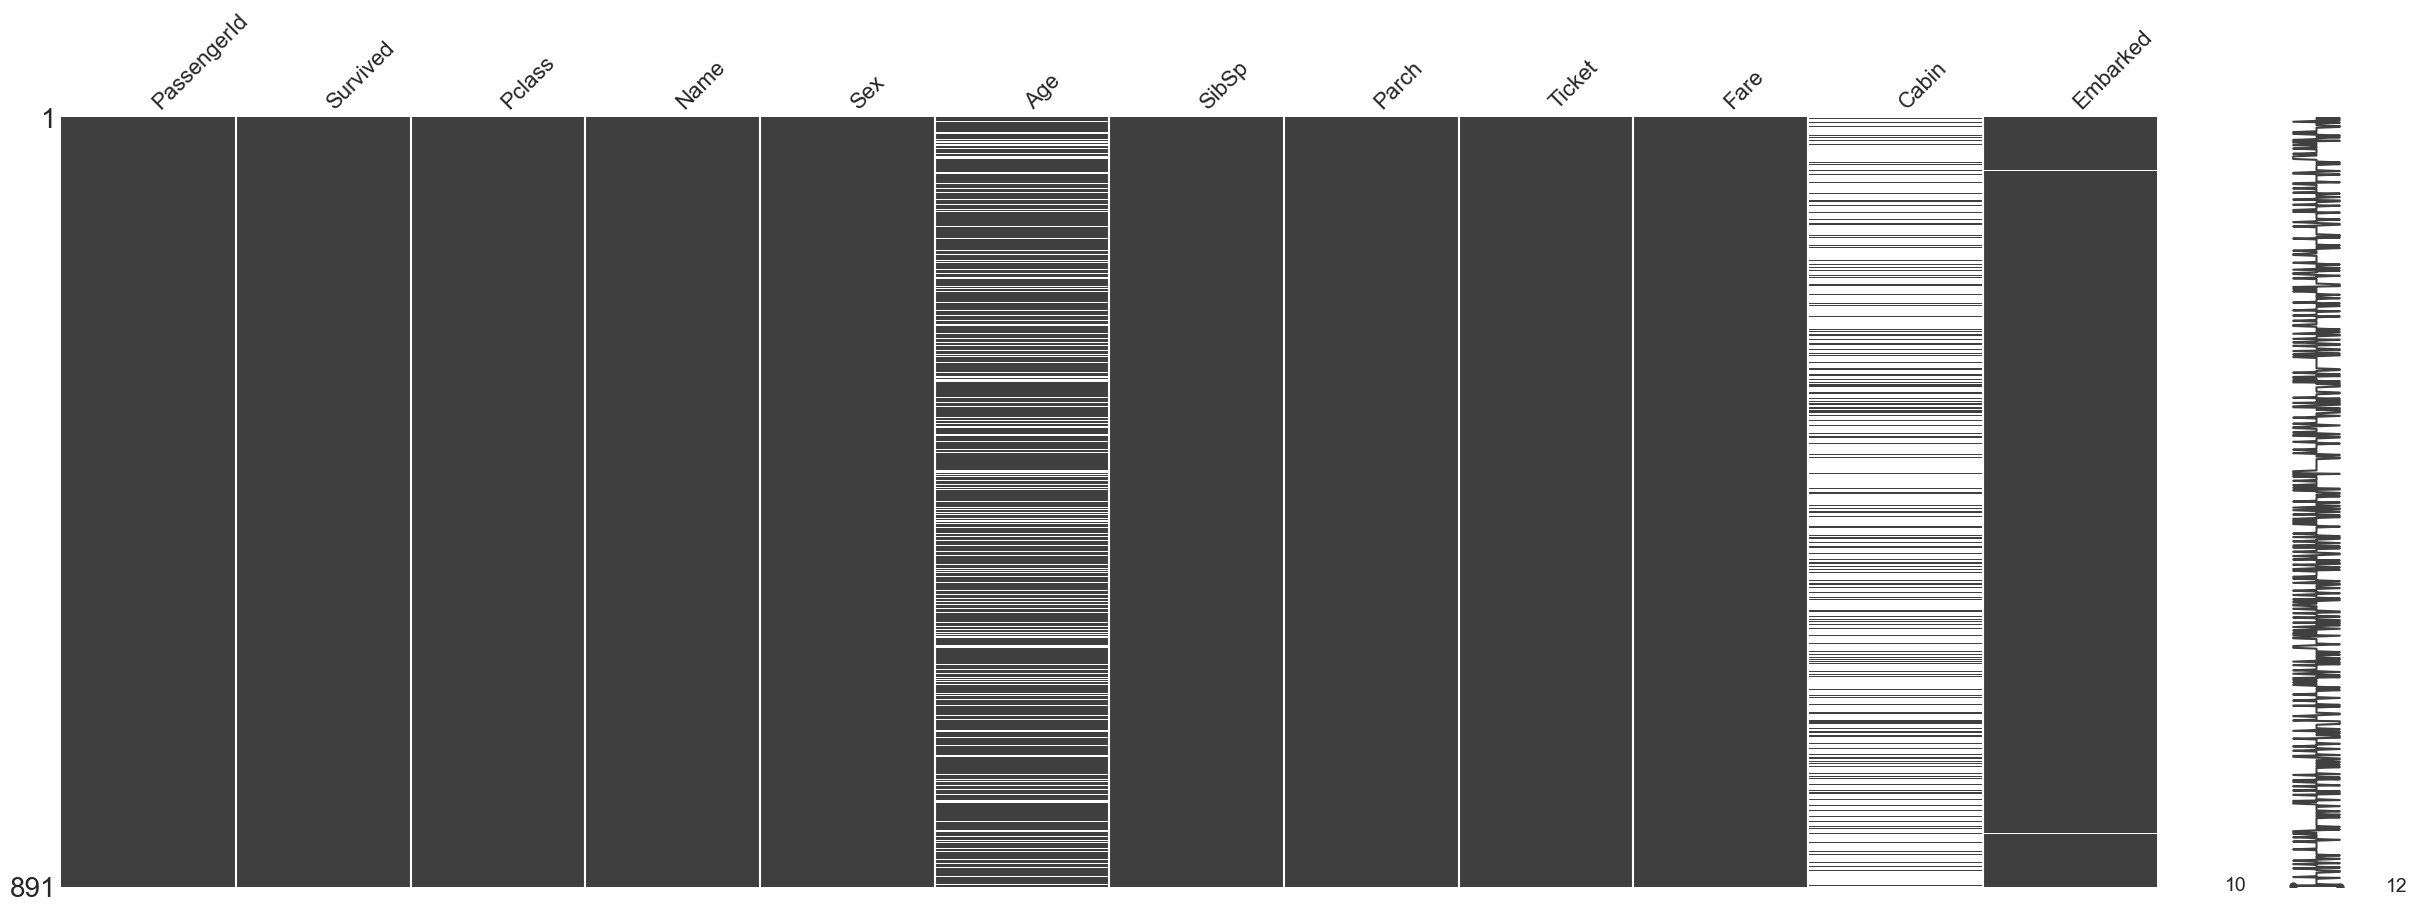

In [188]:
# Plot matrix of missing values
msno.matrix(train_data, figsize = (30, 10))

### Thoughts on matrix

**Age:** White gaps represent missing values, this should be explored further as to why these values are missing. Looking at the CSV file directly, it is noticable that several of the missing appear to Class 3 passengers (with the occasional Class 1 or 2). with the occasional. Visuals will be produced to explore this further. It is possible that Class 3 passenger information was generally poorly recorded.

**Cabin:** A signficiant amount of cabin data is missing according to the matrix, it is not worth investigating this data further based on this as more data is required.

**Embarked:** It has been observed that two entries for "Embarked" are missing.


In [189]:

def find_missing_values(df, columns):
    """
    Function to identify and return the number of missing (NaN) values in each specified column of a DataFrame.

    :param df: DataFrame in which to find missing values.
    :param columns: List of columns in the DataFrame to check for missing values.

    :return: A dictionary with column names as keys and the count of missing values as values.
    """

    print("The missing or NaN values from each column are as follows:")

    # Initialise an empty dictionary to store the count of missing values per column
    missing_values = {}

    # Iterate over each column and count the number of missing values
    for column in columns:
        # Count and assign the number of missing values for the current column
        missing_values[column] = df[column].isnull().sum()
    return missing_values

missing_values_dict = find_missing_values(train_data, columns=train_data.columns)
missing_values_dict


The missing or NaN values from each column are as follows:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

### Create new dataframes
Two new dataframes will be created to seperate discrete and continuous data.


In [190]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [191]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target Variable: Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is the variable we want our machine model to predict based off all features.

Survived
0    549
1    342
Name: count, dtype: int64


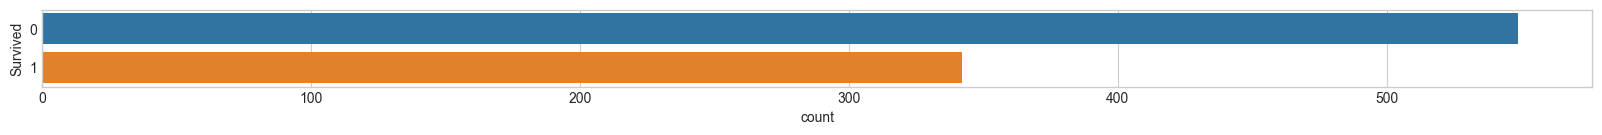

In [192]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train_data)
print(train_data.Survived.value_counts())


In [193]:
# Split the overall survival data to continuous and discretised continuous variable subset dataframes

df_bin["Survived"] = train_data["Survived"] # binary/discretised dataframes
df_con["Survived"] = train_data["Survived"] # continuous dataframes

In [194]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [195]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [196]:
# Different types of data in dataset
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Plotting the Barplots and Kernals for Features

Barplots: Categorical data is to be plotted on a bar chart to see the proportion of each category.

Kernals: Continuous data is to be plotted to understand the spread across the datasets. Any values that fall outside of the distribution may be considered for exclusion from the model.

## Feature: Pclass

Description: The ticket class of the passenger
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

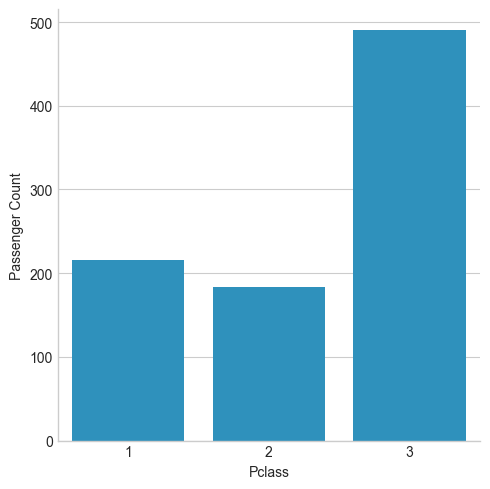

In [197]:
# Plot bar chart for Pclass. This confirms there are only 3 passenger classes in the dataset

Pclass_bar = sns.catplot(train_data["Pclass"], x = train_data["Pclass"].index, kind = "count", color = "#189ad3")
Pclass_bar.set_axis_labels(None, "Passenger Count")

In [198]:
# Are there any missing values for passenger class?
missing_values_dict["Pclass"]

0

## Feature: Name

Description: The name of the passenger

In [199]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
# How many different names of the passengers are there?

train_data["Name"].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [201]:
# Check number of different names using another method

len(train_data.Name)

891

In [202]:
# How many different titles are there?

# Search dataframe for a few observed titles
mr = "Mr"
ms = "Ms"
mrs = "Mrs"
dr = "Dr"
master = "Master"
rev = "Rev"

# Count each title 
# for a quick check, the code was amended and re-used to see the output for each title # (as opposed to writing
# a new code for each title)

count_title = train_data["Name"].apply(lambda x: 1 if mr in x else 0).value_counts()
count_title

Name
1    647
0    244
Name: count, dtype: int64

### Thoughts on Name Feature Data

It has been observed that there other titles for male passengers, such as "Master, "Reverend" and "Mr". I considered exploring whether these titles had an impact on the chance of survival. However, there are so many different names so this is unlikely to be an efficient use of time for the EDA. 

**Conclusion:** Name Feature is to be excluded from the analysis

Sex
male      577
female    314
Name: count, dtype: int64


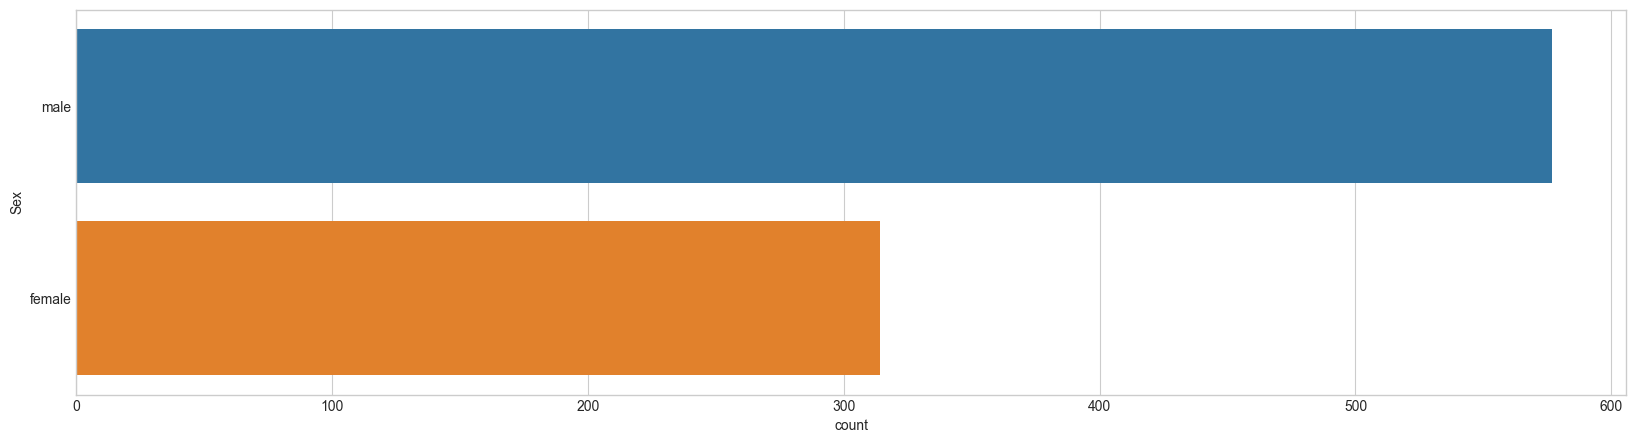

In [203]:
# Distribution of the Sex
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train_data)
print(train_data.Sex.value_counts())

In [204]:
# Check for missing values
missing_values_dict["Sex"]

0

This variable is already binary, therefore it is going to be added directly to the subset dataframe

In [205]:
train_data["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [206]:
# add Sex to the subset dataframes
# for the discretised dataframe, male and female have been split into binary values of 0 and 1 for simplicit

df_bin["Sex"] = train_data["Sex"].map({"male" : 0, "female" : 1}) # male is 0, female is 1
print(df_bin.head()) # Visualise the new column in the binary dataframe;

df_con["Sex"] = train_data["Sex"]
print(df_con.head()) # Visualise the new column in the continuous dataframe


   Survived  Sex
0         0    0
1         1    1
2         1    1
3         1    1
4         0    0
   Survived     Sex
0         0    male
1         1  female
2         1  female
3         1  female
4         0    male


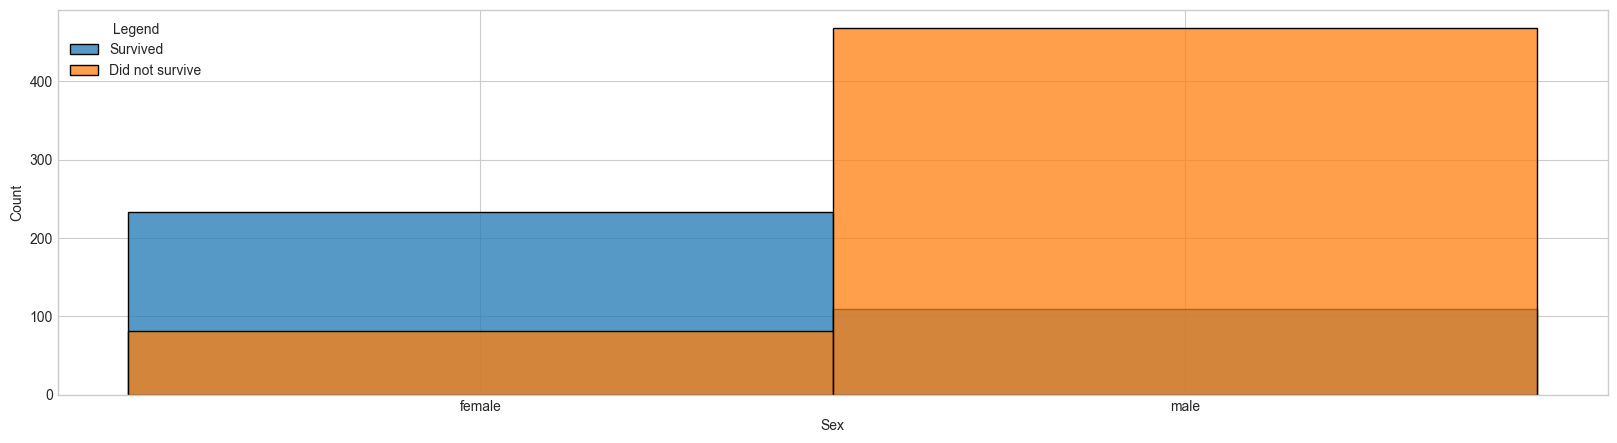

In [207]:
fig = plt.figure(figsize=(20, 5))

# Histogram and KDE for Survived = 1
sns.histplot(df_con.loc[df_con["Survived"] == 1, "Sex"], label="Survived")

# Histogram and KDE for Survived = 0
sns.histplot(df_con.loc[df_con["Survived"] == 0, "Sex"], label = "Did not survive")

# Adding the legend
plt.legend(title="Legend")


Male survival statistics:
Survived
0    468
1    109
Name: count, dtype: int64
Percentage of men who survived: 18.89%


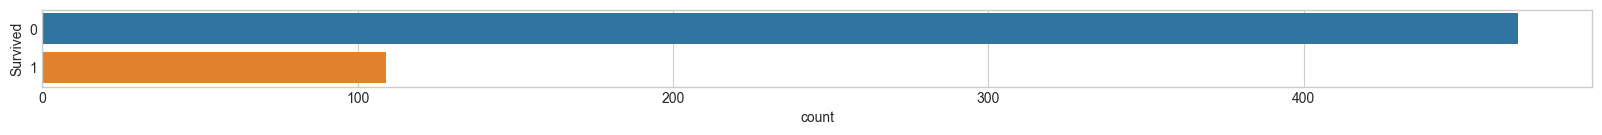

In [208]:
# How many men survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y=train_data.loc[train_data.Sex == "male", "Survived"], data=train_data)
print("Male survival statistics:")
men = train_data.loc[train_data.Sex == "male","Survived"]
print(men.value_counts())
rate_men = sum(men)/len(men)
print(f"Percentage of men who survived: {100*rate_men:.2f}%")

Female survival statistics:
Survived
1    233
0     81
Name: count, dtype: int64
Percentage of women who survived: 74.20%


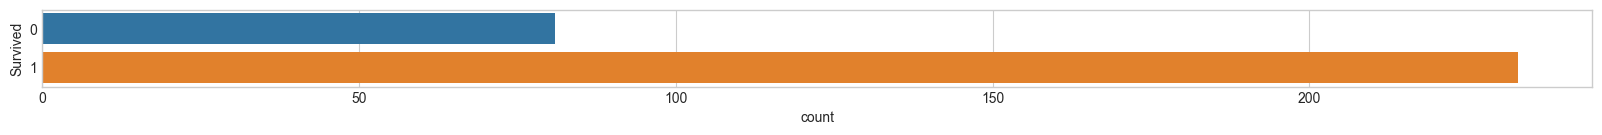

In [209]:
# How many women survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y=train_data.loc[train_data.Sex == "female", "Survived"], data=train_data)
print("Female survival statistics:")
women = train_data.loc[train_data.Sex == "female","Survived"]
print(women.value_counts())
rate_women = sum(women)/len(women)
print(f"Percentage of women who survived: {100*rate_women:.2f}%")

### Analysis of Passenger Survival by Gender
The training dataset reveals that the overall number of survivors was less than the number of those who did not survive. Notably, the data indicates a higher survival count among females compared to males.

## Feature: Age
**Description**: The age of the passenger.

In [210]:
# Are there any missing values for Age?

missing_values_dict["Age"]


177

### Thoughts on missing values

Out of 891 rows, 177 values of Age are missing. That is approximately 20% of the dataset.

My intitial thoughts on proposed solutions:

#### 1. Replacing with the Average Age (Mean Imputation)
**Pros:** 
- Simple and fast.
- Preserves the size of the dataset.
- Works well if the missing data is random and the distribution of Age is not skewed.

**Cons:** 
- Can introduce bias, especially if the missing data is not random (i.e., if there's a reason certain ages are more likely to be missing).
- Reduces the variance of the 'Age' data, potentially affecting model performance.
- May not be suitable if the age distribution is skewed.

#### 3. Median Imputation
**Pros:** 
- Robust to outliers and skewed distributions.
- Preserves the size of the dataset

**Cons:** 
- Can reduce the variability of the data.
- May not be representative if the data is not symmetrically distributed.

#### 4. Mode Imputation
**Pros:**
- Useful for categorical and numerical data.
- Preserves the size of the dataset

**Cons:**
- Can distort the distribution if the mode is not representative.
- May not be suitable for continuous numerical data like age.

#### 5. Model-Based Imputation
**Pros:**
- Utilises relationships with other features for educated guesses.
- Can provide more accurate imputations than simple methods.

**Cons:**
- More complex and time-consuming.
- Risk of introducing bias if the model overfits the data.

#### 6. Multiple Imputation
**Pros:**
- Provides robust estimates by combining results from several imputations.
- Reflects the uncertainty around the true value of missing data.

**Cons:**
- Time, computationally, and statistically intensive.

#### 7. Dropping Rows with Missing Values
**Pros:**
- Simple and ensures only complete data is used in analysis/modeling.
- Good option if the missing data constitutes a small portion of the dataset.

**Cons:**
- Reduces the size of the dataset, this may be a problem as 20% of the data is not insignificant.
- Can introduce bias if the missingness is related to the data itself (not at random).
- Potentially loses valuable information in other columns.

### Conclusion
- Since 20% is a siginficant portion of the dataset, it will better to explore imputation methods 
  as opposed to removing missing rows outright.
- Out of the possible imputation methods, mean and median will be a good starting point. I will 
  consider starting with these methods and potentially explore more complex imputation methods as my
  analysis progresses.

In [211]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

In [212]:
# I decided to create function upon as producing visualisations for each feature became repetitive
# Function tcreate count and distribution visualisations
# Revisit this

def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    Parameters Descriptions:
    ::data:: = target dataframe
    ::bin_df:: = binned dataframe for countplot
    ::label_column:: = binary labelled column
    ::target_column:: = column you want to view counts and distributions
    ::figsize:: = size of figure (width, height)
    ::use_bin_df:: = whether or not to use the bin_df, default False
    """
    fig = plt.figure(figsize=figsize)

    # Count Plot
    plt.subplot(1, 2, 1)
    if use_bin_df:
        sns.countplot(y=target_column, data=bin_df)
    else:
        sns.countplot(y=target_column, data=data)

    # Distribution Plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=data[data[label_column] == 1], x=target_column,
                 kde=True, color="blue", label="Survived", stat="density",
                 element="step", kde_kws=dict(cut=3))
    sns.histplot(data=data[data[label_column] == 0], x=target_column,
                 kde=True, color="red", label="Did not survive", stat="density",
                 element="step", kde_kws=dict(cut=3))

    plt.legend(title=label_column)

    plt.show()


## Feature: SibSp
**Description**: The number of siblings and/or spouses the passenger had on the Titanic.

In [213]:
# Are there any missing values for SibSp?

missing_values_dict["SibSp"]

0

In [214]:
# What are the possible values for this feature?
train_data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [215]:
# Add SibSp to the subset dataframes
df_bin["SibSP"] = train_data["SibSp"]
df_con["SibSP"] = train_data["SibSp"]

print(df_bin)
print(df_con)

     Survived  Sex  SibSP
0           0    0      1
1           1    1      1
2           1    1      0
3           1    1      1
4           0    0      0
..        ...  ...    ...
886         0    0      0
887         1    1      0
888         0    1      1
889         1    0      0
890         0    0      0

[891 rows x 3 columns]
     Survived     Sex  SibSP
0           0    male      1
1           1  female      1
2           1  female      0
3           1  female      1
4           0    male      0
..        ...     ...    ...
886         0    male      0
887         1  female      0
888         0  female      1
889         1    male      0
890         0    male      0

[891 rows x 3 columns]


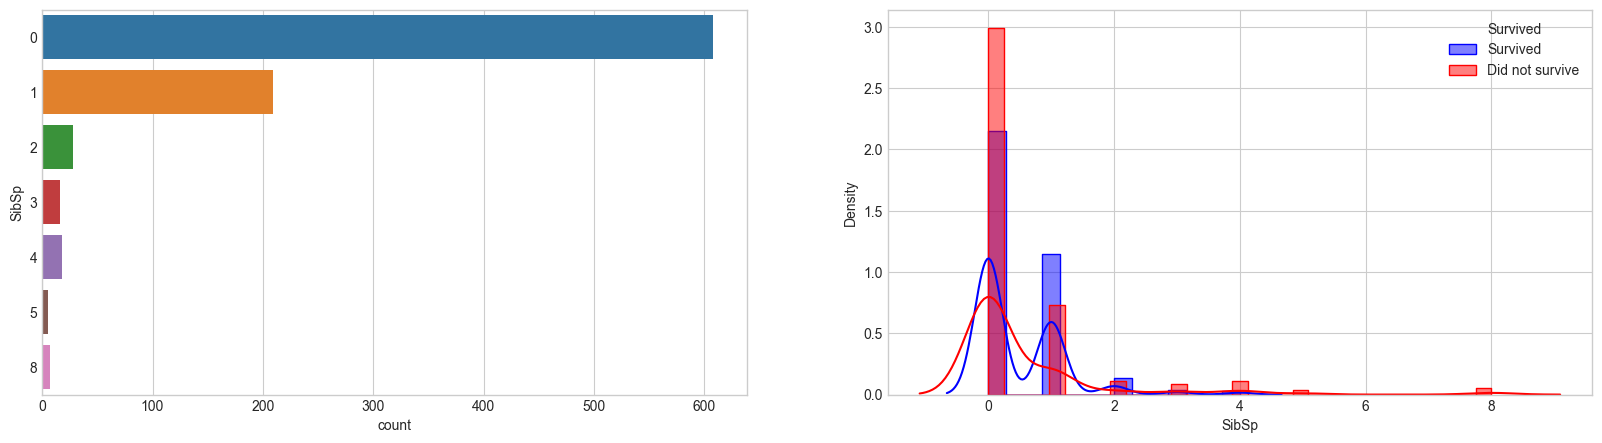

In [217]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train_data, df_bin, "Survived", "SibSp", figsize = (20,5), use_bin_df = False)

### Analysis of Passenger Survival by SibSp

The visualisations illuminate the relationship between the number of siblings/spouses aboard (SibSp) and passenger survival. Key insights include:

- **Most passengers were alone:** A considerable number of passengers had no siblings or spouses with them, indicating that single travellers were predominant aboard the Titanic.
- **Positive correlation for one companion:** Passengers with one sibling or spouse aboard seem to have a marginally higher chance of survival, suggesting that travelling with a single companion could have conferred some survival benefits.
- **Data scarcity for larger families:** Very few passengers were accompanied by a large number of siblings or spouses. The lack of datapoints makes it difficult to draw definitive conclusions regarding the survival rates for these individuals.

### Feature Engineering Considerations

In light of the analysis, the following strategies could be contemplated for feature engineering:

- **Re-categorise SibSp:** Transform the SibSp feature into categorical bins such as 'alone', 'one sibling or spouse', and 'two or more siblings or spouses'. This may help to reveal non-linear effects on survival.
- **Create family size feature:** Investigate the interaction between 'SibSp' and 'Parch' (number of parents and children aboard) to create a composite feature reflecting the total family size aboard. This could yield a more comprehensive understanding of the impact of family dynamics on survival.


## Feature: Parch

**Description**: This feature counts the number of parents or children each passenger had on board.

Given the similarity to `SibSp`, which counts siblings or spouses aboard, `Parch` will be analysed to discern patterns of survival in relation to family size and dynamics.

In [221]:
# How many missing values does Parch have?
missing_values_dict["Parch"]

0

In [224]:
# What are the possible values for this feature?
train_data["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [225]:
# Add Parch to the subset dataframes
df_bin['Parch'] = train_data['Parch']
df_con['Parch'] = train_data['Parch']

print(df_bin)
print(df_con)

     Survived  Sex  SibSP  Parch
0           0    0      1      0
1           1    1      1      0
2           1    1      0      0
3           1    1      1      0
4           0    0      0      0
..        ...  ...    ...    ...
886         0    0      0      0
887         1    1      0      0
888         0    1      1      2
889         1    0      0      0
890         0    0      0      0

[891 rows x 4 columns]
     Survived     Sex  SibSP  Parch
0           0    male      1      0
1           1  female      1      0
2           1  female      0      0
3           1  female      1      0
4           0    male      0      0
..        ...     ...    ...    ...
886         0    male      0      0
887         1  female      0      0
888         0  female      1      2
889         1    male      0      0
890         0    male      0      0

[891 rows x 4 columns]


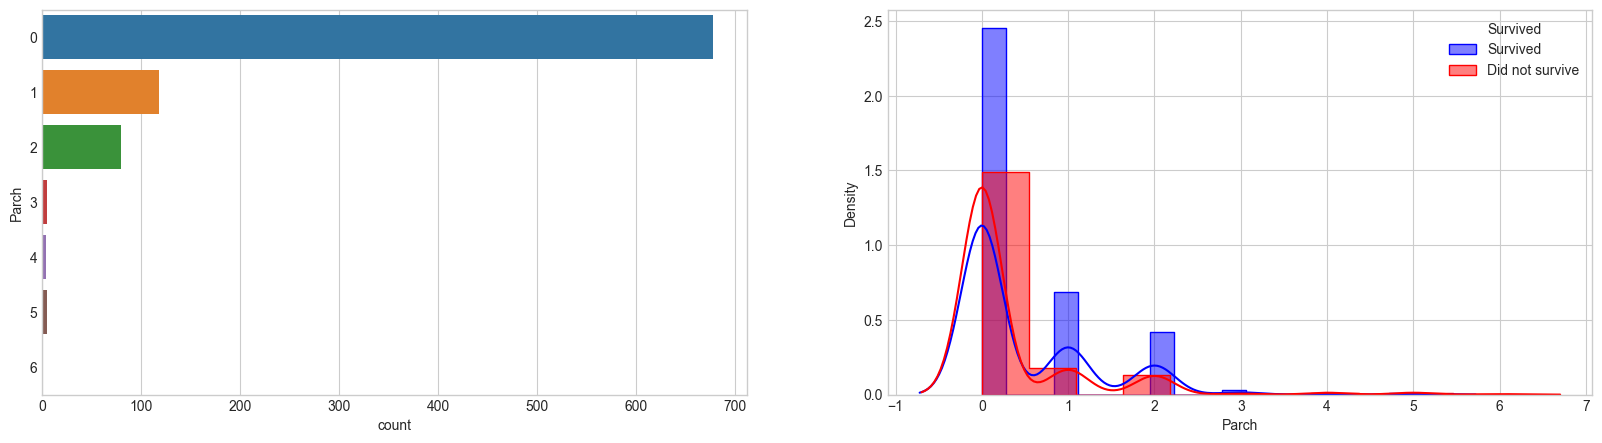

In [226]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train_data, df_bin, "Survived", "Parch", figsize = (20,5), use_bin_df = False)

# Cut-off point

In [29]:
from sklearn.ensemble import RandomForestClassifier

Y_train = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : predictions})
output.to_csv('submission.csv', index = False)

In [30]:
# Load the submission data
submission_data = pd.read_csv(r"C:\Users\joshu\Documents\Kaggle Competitions\Titanic - Machine Learning from Disaster\submission.csv")
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Pclass
1    216
2    184
3    491
Name: count, dtype: int64


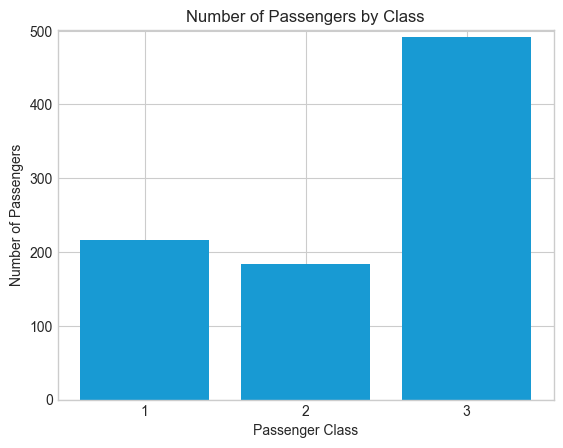

In [31]:
# Count the number of passengers by Pclass
passenger_count_by_pclass_train = train_data['Pclass'].value_counts().sort_index()
print(passenger_count_by_pclass_train)

# Plotting the bar chart for passenger count by Pclass
plt.bar(passenger_count_by_pclass_train.index.astype(str),passenger_count_by_pclass_train.values, color = "#189ad3")
plt.title("Number of Passengers by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.ylim((0, passenger_count_by_pclass_train.values.max() + 10))
plt.show()

In [302]:
# Function to build bar chart
def survivor_statistics(original_dataframe, result_dataframe = None, category = None, result_column = "Survived"):
    
    # Get unique categories
    unique_categories = original_dataframe[category].unique()
    if result_dataframe is None:
        result_dataframe = original_dataframe
        
    if result_column in original_dataframe.columns:
        merged_dataframe = original_dataframe
        
    else:
        merged_dataframe = pd.merge(original_dataframe, result_dataframe, how = "left", on = "PassengerId")
        
    # Create a new CSV for the mertged dataframe
    merged_dataframe.to_csv('merged_dataframe_with_results.csv', index=False)
            
    # If the category is numeric, we sort the unique values; otherwise, we convert to list directly
    if pd.api.types.is_numeric_dtype(merged_dataframe[category]):
        unique_categories.sort()
    else:
        unique_categories = list(unique_categories)
   
    # Count the number of passengers by category 
    passenger_count_by_category_train = merged_dataframe[category].value_counts().reindex(unique_categories, fill_value = 0).sort_index()
    print(passenger_count_by_category_train)
    
    # Count number of survivors in category 
    survivor_count_by_category_train = merged_dataframe[merged_dataframe["Survived"] == 1][category].value_counts().reindex(unique_categories, fill_value = 0).sort_index()
    print(survivor_count_by_category_train)
    
    # Count number of fatalities in category 
    fatality_count_by_category_train = merged_dataframe[merged_dataframe["Survived"] == 0][category].value_counts().reindex(unique_categories, fill_value = 0).sort_index()
    print(fatality_count_by_category_train)
    
    # Plot bar charts
    plt.bar(passenger_count_by_category_train.index, survivor_count_by_category_train.values, label = "Survivors")
    plt.bar(passenger_count_by_category_train.index, fatality_count_by_category_train, bottom = survivor_count_by_category_train.values, label = "Fatalities")
    plt.title(f"Proportion of Survivors vs Fatalities by {category}")
    plt.xlabel(f"{category}")
    plt.ylabel(f"Number of Passengers")
    plt.xticks(passenger_count_by_category_train.index)
    plt.ylim(0, 500)
    plt.legend()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Pclass
1    136
2     87
3    119
Name: count, dtype: int64
Pclass
1     80
2     97
3    372
Name: count, dtype: int64


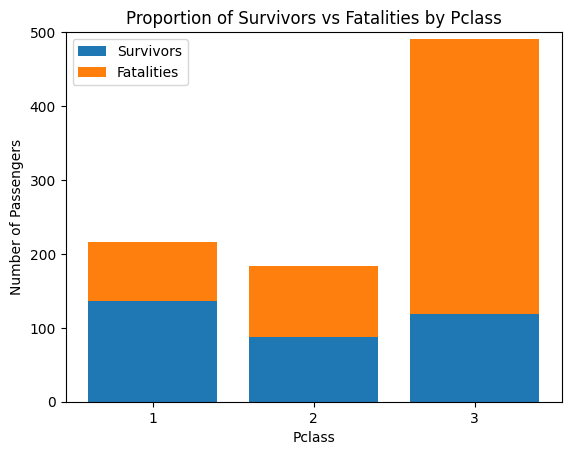

In [303]:
# Survivor statistic by Passenger Class (Pclass) - Training Data
survivor_statistics(original_dataframe = train_data, result_dataframe = None, category = "Pclass", result_column = "Survived")

Pclass
1    107
2     93
3    218
Name: count, dtype: int64
Pclass
1    53
2    31
3    64
Name: count, dtype: int64
Pclass
1     54
2     62
3    154
Name: count, dtype: int64


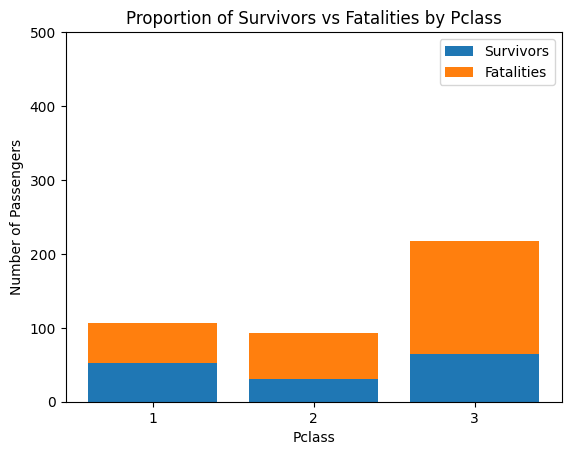

In [304]:
# Survivor statistic by Passenger Class (Pclass) - Test Data
survivor_statistics(original_dataframe = test_data, result_dataframe = submission_data, category = "Pclass", result_column = "Survived")

Sex
female    314
male      577
Name: count, dtype: int64
Sex
female    233
male      109
Name: count, dtype: int64
Sex
female     81
male      468
Name: count, dtype: int64


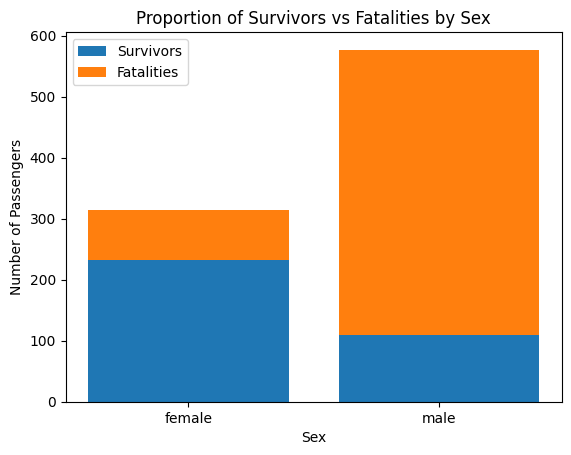

In [250]:
# Survivor statistic by Passenger Class (Sex) - Training Data
survivor_statistics(train_data, train_data, 'Sex')

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: count, dtype: int64
SibSp
0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: count, dtype: int64


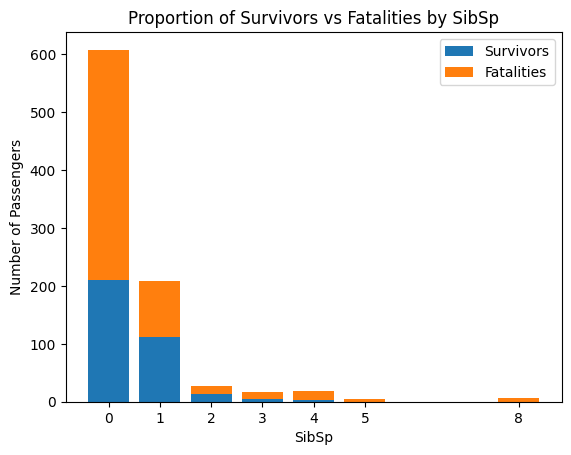

In [251]:
# Survivor statistic by number of siblings and spouses - Training Data
survivor_statistics(train_data, train_data, 'SibSp')



Sex
female    314
male      577
Name: count, dtype: int64
Sex
female    233
male      109
Name: count, dtype: int64
Sex
female     81
male      468
Name: count, dtype: int64


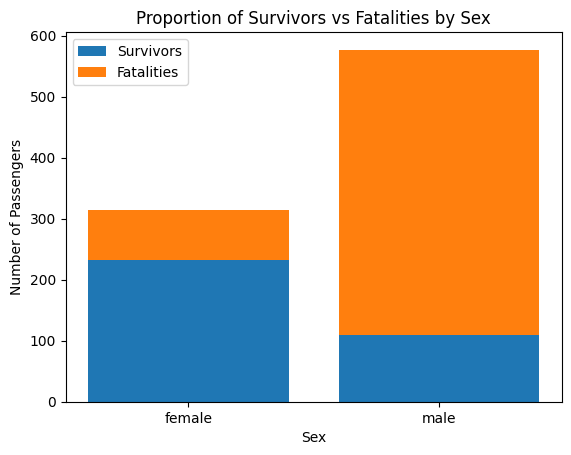

In [254]:
# Survivor statistic by number of parents and children - Training Data
survivor_statistics(train_data, train_data, 'Sex')

# Survivor statistic by number of parents and children - Test Data
survivor_statistics(train_data, train_data, 'Sex')

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64
Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: count, dtype: int64
Parch
0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: count, dtype: int64


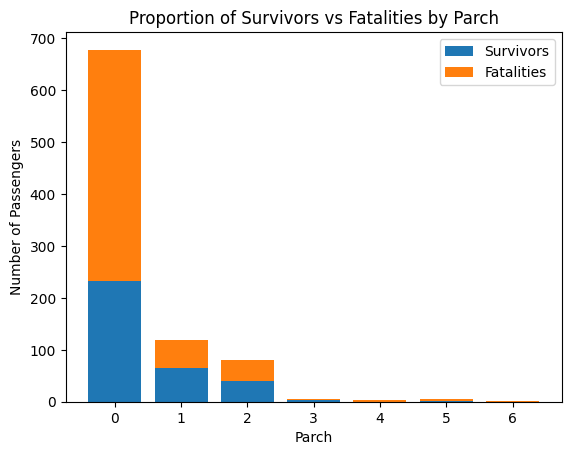

In [252]:
# Survivor statistic by number of parents and children - Training Data
survivor_statistics(train_data, train_data, 'Parch')